# 🦑EDA Анализ электрохимических данных

**Автор:** Анна Пономарец
**Проект:** Анализ электрохимии с дата инжиниринга

## Оглавление
1. [Введение]
2. [Загрузка данных]
3. [Оценка базовых данных]
4. [Оценка полноты данных]
5. [Оценка уникальности]
6. [Статистический анализ данных]
6. [АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ]
   [выводы по разделам]
7. [Заключение]


## 🐙Введение

**Цель исследования:** Провести exploratory data analysis (EDA) электрохимических данных для оценки их качества и пригодности для дальнейшего анализа.

**Задачи:**
- Оценить структуру и объем данных
- Проверить полноту данных (Completeness ≥ 0.98)
- Проверить уникальность записей (Uniqueness = 1.0)
- Выявить выбросы и аномалии
- Сформулировать рекомендации по предобработке

**Метрики качества:**
- Completeness (полнота) ≥ 0.98
- Uniqueness (уникальность) = 1.0

** 🧠 Загрузка данных**


In [2]:
print("🎉 Тестируем подключение...")
import sys
import os  # Добавляем импорт os

sys.path.append('/workspaces/EC-lab-files')

try:
    from data_loader import main as load_data
    print("✅ Дата-лоадер подключен!")
    
    import pandas as pd
    print("✅ Pandas подключен!")
    
    # Проверим есть ли уже файлы
    if os.path.exists("инжиниринг.parquet"):
        df = pd.read_parquet("инжиниринг.parquet")
        print(f"✅ Файл найден: {df.shape}")
        print(f"📊 Колонки: {list(df.columns)}")
        print(f"🔍 Первые 5 строк:")
        print(df.head())
    else:
        print("📥 Файла нет, нужно запустить дата-лоадер")
        # Можно автоматически запустить загрузку
        try:
            print("🔄 Запускаем дата-лоадер...")
            load_data()
            if os.path.exists("инжиниринг.parquet"):
                df = pd.read_parquet("инжиниринг.parquet")
                print(f"✅ Файл создан: {df.shape}")
            else:
                print("❌ Дата-лоадер не создал файл")
        except Exception as load_error:
            print(f"❌ Ошибка при загрузке данных: {load_error}")
        
except Exception as e:
    print(f"❌ Ошибка: {e}")
    print(f"🔍 Трассировка: {sys.exc_info()}")

🎉 Тестируем подключение...
✅ Дата-лоадер подключен!
✅ Pandas подключен!


✅ Файл найден: (1048514, 27)
📊 Колонки: ['id', 'mode', 'ox/red', 'error', 'control changes', 'Ns changes', 'counter inc.', 'Ns', 'time/s', 'control/V', 'Ewe/V', '<I>/mA', 'dQ/C', '(Q-Qo)/C', 'I Range', 'Q charge/discharge/mA.h', 'half cycle', 'Energy charge/W.h', 'Energy discharge/W.h', 'Capacitance charge/µF', 'Capacitance discharge/µF', 'Q discharge/mA.h', 'Q charge/mA.h', 'Capacity/mA.h', 'Efficiency/%', 'cycle number', 'P/W']
🔍 Первые 5 строк:
                             id  mode ox/red  error  control changes  \
0  -0,3V CA with magnet_C01.mpt   2.0      0    0.0              1.0   
1  -0,3V CA with magnet_C01.mpt   2.0      0    0.0              1.0   
2  -0,3V CA with magnet_C01.mpt   2.0      0    0.0              1.0   
3  -0,3V CA with magnet_C01.mpt   2.0      0    0.0              1.0   
4  -0,3V CA with magnet_C01.mpt   2.0      0    0.0              1.0   

   Ns changes  counter inc.   Ns  time/s  control/V  ...  Energy charge/W.h  \
0         0.0           0.0  0.0    

In [3]:
# Запускаем дата-лоадер для скачивания данных
print("📥 Запускаем дата-лоадер...")
from data_loader import main as load_data

load_data()

print("✅ Данные должны быть скачаны и обработаны!")

📥 Запускаем дата-лоадер...
Файл уже существует. Проверяем хэш…


Текущий SHA256: d380426c075b294b3a5808b987a352c53e8b3ff3ae99e6bec50423a710166c1f
✅ Хэш совпадает — используем локальный файл.
Читаем CSV с 62-й строки как заголовок...
🧮 Нормализуем числовые данные (запятые → точки, e-формат)...

Первые 10 ID:
0    -0,3V CA with magnet_C01.mpt
1    -0,3V CA with magnet_C01.mpt
2    -0,3V CA with magnet_C01.mpt
3    -0,3V CA with magnet_C01.mpt
4    -0,3V CA with magnet_C01.mpt
5    -0,3V CA with magnet_C01.mpt
6    -0,3V CA with magnet_C01.mpt
7    -0,3V CA with magnet_C01.mpt
8    -0,3V CA with magnet_C01.mpt
9    -0,3V CA with magnet_C01.mpt
Name: id, dtype: category
Categories (69, object): ['-0,3V CA with magnet_C01.mpt', '-0,3V CA without magnet_C01.mpt', '-0,3V pure biooil C-C electrode 23.01_C01.mpt', '-0,3V with magnet_C01.mpt', ..., 'ca  test biooil blank C ZnCl2 1,5M раздельная..., 'ca biooil blank C HCl 1M раздельная ячейка ра..., 'ca biooil blank C ZnCl2 1,5M раздельная ячейк..., 'ca biooil blank C ZnCl2 1M раздельная ячейка ...]

Первые 10

In [4]:
# Проверяем создание файлов
import os

files = ["инжиниринг.csv", "инжиниринг.parquet"]
for file in files:
    if os.path.exists(file):
        print(f"✅ {file} - создан")
        file_size = os.path.getsize(file) / (1024*1024)  # размер в MB
        print(f"   Размер: {file_size:.2f} MB")
    else:
        print(f"❌ {file} - не найден")

✅ инжиниринг.csv - создан
   Размер: 211.84 MB
✅ инжиниринг.parquet - создан
   Размер: 5.83 MB


In [5]:
# Загружаем данные из Parquet
df = pd.read_parquet("инжиниринг.parquet")
print(f"✅ Данные загружены в DataFrame")
print(f"📊 Размер: {df.shape}")

# Показываем первые строки
print("\n🔍 Первые 3 строки:")
display(df.head(3))

✅ Данные загружены в DataFrame
📊 Размер: (1048514, 27)

🔍 Первые 3 строки:


,id,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,control/V,...,Energy charge/W.h,Energy discharge/W.h,Capacitance charge/µF,Capacitance discharge/µF,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,cycle number,P/W
0,"-0,3V CA with magnet_C01.mpt",2.0,0,0.0,1.0,0.0,0.0,0.0,0.1,-0.955,...,0.0,3.600000e-08,0.0,0.0,0.000038,0.0,0.000038,0.0,0.0,0.00597
1,"-0,3V CA with magnet_C01.mpt",2.0,0,0.0,1.0,0.0,0.0,0.0,0.2,-0.955,...,0.0,1.320000e-07,0.0,8690000.0,0.000138,0.0,0.000138,0.0,0.0,0.00346
2,"-0,3V CA with magnet_C01.mpt",2.0,0,0.0,1.0,0.0,0.0,0.0,0.3,-0.955,...,0.0,1.880000e-07,0.0,12400000.0,0.000197,0.0,0.000197,0.0,0.0,0.00203


** 🍧Оценка базовых данных**


In [7]:
print("## БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("=" * 40)

print(f"📊 Общее количество записей: {df.shape[0]:,}")
print(f"🎯 Количество признаков: {df.shape[1]}")
print(f"💾 Объем данных: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 Типы данных:")
print(df.dtypes.value_counts())

## БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ
📊 Общее количество записей: 1,048,514
🎯 Количество признаков: 27
💾 Объем данных: 250.91 MB

📋 Типы данных:
float64     25
category     1
object       1
Name: count, dtype: int64


👛 Оценка полноты данных

## ОЦЕНКА ПОЛНОТЫ ДАННЫХ (COMPLETENESS)
📊 Общая статистика полноты:
   Средняя полнота: 0.8963
   Минимальная полнота: 0.7884
🎯 ЦЕЛЕВОЙ ПОКАЗАТЕЛЬ: ≥ 0.98


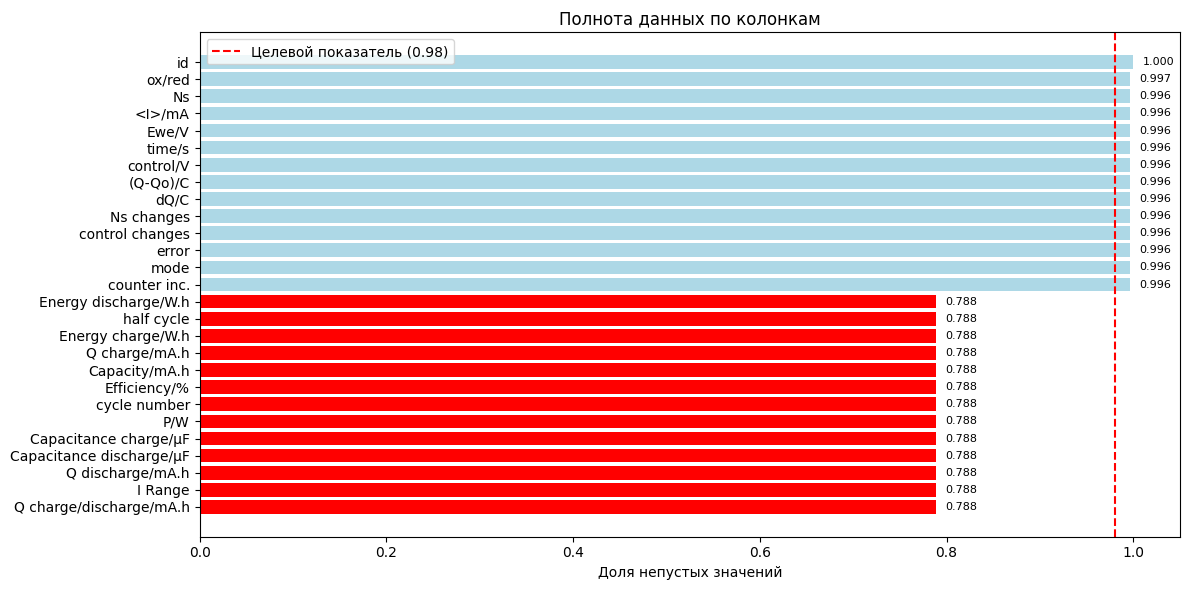

✅ Колонки с полнотой ≥ 0.98: 14/27
⚠️ Проблемные колонки (13 шт.):
   Q charge/discharge/mA.h: 0.7884 (пропусков: 221911)
   I Range: 0.7884 (пропусков: 221911)
   Q discharge/mA.h: 0.7884 (пропусков: 221911)
   Capacitance discharge/µF: 0.7884 (пропусков: 221911)
   Capacitance charge/µF: 0.7884 (пропусков: 221911)
   P/W: 0.7884 (пропусков: 221911)
   cycle number: 0.7884 (пропусков: 221911)
   Efficiency/%: 0.7884 (пропусков: 221911)
   Capacity/mA.h: 0.7884 (пропусков: 221911)
   Q charge/mA.h: 0.7884 (пропусков: 221911)
   Energy charge/W.h: 0.7884 (пропусков: 221911)
   half cycle: 0.7884 (пропусков: 221911)
   Energy discharge/W.h: 0.7884 (пропусков: 221911)


In [9]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    print("❌ matplotlib не установлен. Устанавливаем...")
    !pip install matplotlib
    import matplotlib.pyplot as plt

import pandas as pd

print("## ОЦЕНКА ПОЛНОТЫ ДАННЫХ (COMPLETENESS)")
print("=" * 50)

# Проверяем, что df существует
if 'df' not in locals():
    print("❌ DataFrame 'df' не найден!")
    # Здесь можно добавить код для загрузки данных
else:
    # Расчет полноты
    completeness = df.notnull().mean()
    completeness_df = pd.DataFrame({
        'Колонка': completeness.index,
        'Полнота': completeness.values,
        'Пропуски': df.isnull().sum().values
    }).sort_values('Полнота')

    print(f"📊 Общая статистика полноты:")
    print(f"   Средняя полнота: {completeness.mean():.4f}")
    print(f"   Минимальная полнота: {completeness.min():.4f}")
    print(f"🎯 ЦЕЛЕВОЙ ПОКАЗАТЕЛЬ: ≥ 0.98")

    # Визуализация
    plt.figure(figsize=(12, 6))
    bars = plt.barh(completeness_df['Колонка'], completeness_df['Полнота'], 
                    color=['red' if x < 0.98 else 'lightblue' for x in completeness_df['Полнота']])
    plt.axvline(x=0.98, color='red', linestyle='--', label='Целевой показатель (0.98)')
    plt.xlabel('Доля непустых значений')
    plt.title('Полнота данных по колонкам')
    plt.legend()

    # Добавляем значения на бары
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
                 ha='left', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

    # Анализ достижения целей
    good_columns = completeness_df[completeness_df['Полнота'] >= 0.98]
    problem_columns = completeness_df[completeness_df['Полнота'] < 0.98]
    
    print(f"✅ Колонки с полнотой ≥ 0.98: {len(good_columns)}/{len(df.columns)}")
    
    if len(problem_columns) > 0:
        print(f"⚠️ Проблемные колонки ({len(problem_columns)} шт.):")
        for _, row in problem_columns.iterrows():
            print(f"   {row['Колонка']}: {row['Полнота']:.4f} (пропусков: {row['Пропуски']})")
    else:
        print("🎉 Все колонки соответствуют целевому показателю!")

👽 Уникальность данных

In [11]:
print("## ОЦЕНКА УНИКАЛЬНОСТИ ДАННЫХ (UNIQUENESS)")
print("=" * 50)

# Проверяем ID колонку
if 'id' in df.columns:
    total_ids = len(df)
    unique_ids = df['id'].nunique()
    uniqueness_ratio = unique_ids / total_ids
    
    print(f"🔍 Анализ колонки 'id':")
    print(f"   Всего ID: {total_ids:,}")
    print(f"   Уникальных ID: {unique_ids:,}")
    print(f"   Коэффициент уникальности: {uniqueness_ratio:.6f}")
    
    if uniqueness_ratio == 1.0:
        print("   🎉 ЦЕЛЕВОЙ ПОКАЗАТЕЛЬ ДОСТИГНУТ: = 1.0")
    else:
        print(f"   ⚠️ Найдено дубликатов: {total_ids - unique_ids}")
        
        # Покажем примеры дубликатов
        duplicates = df[df.duplicated(subset=['id'], keep=False)]
        if len(duplicates) > 0:
            duplicate_counts = duplicates['id'].value_counts().head(3)
            print(f"   Примеры дублирующихся ID:")
            for dup_id, count in duplicate_counts.items():
                print(f"      {dup_id}: {count} повторений")
else:
    print("⚠️ Колонка 'id' не найдена в данных")
    
    # Проверяем полные дубликаты строк
    total_duplicates = df.duplicated().sum()
    if total_duplicates > 0:
        print(f"🔍 Найдено полных дубликатов строк: {total_duplicates}")
    else:
        print("✅ Полных дубликатов строк не найдено")

## ОЦЕНКА УНИКАЛЬНОСТИ ДАННЫХ (UNIQUENESS)
🔍 Анализ колонки 'id':
   Всего ID: 1,048,514
   Уникальных ID: 69
   Коэффициент уникальности: 0.000066
   ⚠️ Найдено дубликатов: 1048445
   Примеры дублирующихся ID:
      -0,3V pure biooil C-C electrode 23.01_C01.mpt: 72061 повторений
      ca biooil blank C ZnCl2 1,5M раздельная ячейка рабочий в электролите ХС в масле sp200_C01.mpt: 72061 повторений
      ca biooil blank C HCl 1M раздельная ячейка рабочий в электрлите противо в масле, сравнения в электролите, HCl электролит 1М в 1 части_C01.mpt: 72061 повторений


🗿 Статистический анализ данных

In [ ]:
print("## СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ ДАННЫХ")
print("=" * 50)

# Выбираем числовые колонки
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"🔢 Числовых колонок: {len(numeric_cols)}")

if len(numeric_cols) > 0:
    print("\n📊 Базовая статистика:")
    display(df[numeric_cols].describe())
    
    # Анализ выбросов для ключевых метрик
    key_metrics = ['Ewe/V', 'control/V', '<I>/mA', 'Capacity/mA.h', 'cycle number']
    available_metrics = [m for m in key_metrics if m in df.columns]
    
    if available_metrics:
        print(f"\n📈 Ключевые метрики: {available_metrics}")
        for col in available_metrics:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
            print(f"   {col}: {len(outliers)} выбросов ({len(outliers)/len(df)*100:.2f}%)")

## СТАТИСТИЧЕСКИЙ АНАЛИЗ ЧИСЛОВЫХ ДАННЫХ
🔢 Числовых колонок: 25

📊 Базовая статистика:


,mode,error,control changes,Ns changes,counter inc.,Ns,time/s,control/V,Ewe/V,<I>/mA,dQ/C,(Q-Qo)/C,I Range,Q charge/discharge/mA.h,half cycle,Energy charge/W.h,Energy discharge/W.h,Capacitance charge/µF,Capacitance discharge/µF,Q discharge/mA.h,Q charge/mA.h,Capacity/mA.h,Efficiency/%,cycle number,P/W
count,1044527.0,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,1.044527e+06,826603.000000,826603.000000,826603.000000,8.266030e+05,826603.000000,8.266030e+05,8.266030e+05,826603.000000,8.266030e+05,826603.000000,826603.000000,826603.0,826603.000000
mean,2.0,1.378614e-04,6.168907e-01,9.690702e-02,1.527914e+02,-1.934966e-01,1.239721e+03,-1.915920e+00,4.064194e-01,-8.577346e+00,-3.002817e+00,-5.353676e+00,11.164437,-1.877852,0.007976,4.211386e-09,0.002205,1.185375e+05,7.737978e+10,1.877852,1.046280e-07,1.877852,0.002165,0.0,0.012210
std,0.0,1.174064e-02,4.861448e-01,2.958313e-01,3.695561e+02,4.325359e-01,1.677984e+03,4.913982e+00,2.820096e+00,1.377218e+01,1.214451e+01,1.005660e+01,1.023713,3.015908,0.088952,4.681752e-08,0.004051,1.447408e+06,1.986246e+11,3.015908,8.198222e-06,3.015908,1.968813,0.0,0.020654
min,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,-4.500000e+01,-1.400000e+00,-6.250000e+01,-6.310000e+01,-6.310000e+01,9.000000,-17.500000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.0,-0.000570
25%,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.740000e+01,-1.300000e+00,-1.160000e+00,-8.030000e+00,-6.380000e+00,-6.380000e+00,10.000000,-2.460000,0.000000,0.000000e+00,0.000029,0.000000e+00,2.010000e+09,0.077600,0.000000e+00,0.077600,0.000000,0.0,0.000059
50%,2.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.380000e+02,-9.550000e-01,-7.000000e-01,-2.770000e+00,-4.120000e-01,-4.120000e-01,11.000000,-0.389000,0.000000,0.000000e+00,0.000313,0.000000e+00,9.040000e+09,0.389000,0.000000e+00,0.389000,0.000000,0.0,0.000834
75%,2.0,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.310000e+03,-3.000000e-01,-3.000000e-01,-1.500000e-01,-5.310000e-02,-5.310000e-02,12.000000,-0.077600,0.000000,0.000000e+00,0.002320,0.000000e+00,6.310000e+10,2.460000,0.000000e+00,2.460000,0.000000,0.0,0.011200
max,2.0,1.000000e+00,1.000000e+00,1.000000e+00,1.600000e+03,2.000000e+00,7.200000e+03,4.680000e+00,1.000000e+01,8.130000e-01,1.400000e+01,6.300000e-02,14.000000,0.000752,1.000000,5.260000e-07,0.023800,1.420000e+08,3.310000e+12,17.500000,7.520000e-04,17.500000,1790.000000,0.0,0.084400



📈 Ключевые метрики: ['Ewe/V', 'control/V', '<I>/mA', 'Capacity/mA.h', 'cycle number']
   Ewe/V: 217943 выбросов (20.79%)
   control/V: 83046 выбросов (7.92%)
   <I>/mA: 138604 выбросов (13.22%)
   Capacity/mA.h: 77999 выбросов (7.44%)
   cycle number: 0 выбросов (0.00%)


🔎 Анализ категориальных данный

In [ ]:
print("## АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ")
print("=" * 40)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"🏷️ Категориальных колонок: {len(categorical_cols)}")

for col in categorical_cols:
    print(f"\n📊 {col}:")
    print(f"   Уникальных значений: {df[col].nunique()}")
    print(f"   Топ-5 значений:")
    display(df[col].value_counts().head())
    

## АНАЛИЗ КАТЕГОРИАЛЬНЫХ ДАННЫХ
🏷️ Категориальных колонок: 2

📊 id:
   Уникальных значений: 69
   Топ-5 значений:


id
-0,3V pure biooil C-C electrode 23.01_C01.mpt                                                                                                    72061
ca biooil blank C ZnCl2 1,5M раздельная ячейка рабочий в электролите ХС в масле sp200_C01.mpt                                                    72061
ca biooil blank C HCl 1M раздельная ячейка рабочий в электрлите противо в масле, сравнения в электролите, HCl электролит 1М в 1 части_C01.mpt    72061
ca biooil blank C ZnCl2 1M раздельная ячейка рабочий в электрлите пртиво в масле_C01.mpt                                                         47109
-1,2V Cu foam 20 min CA 3_C01.mpt                                                                                                                32355
Name: count, dtype: int64


📊 ox/red:
   Уникальных значений: 84
   Топ-5 значений:


ox/red
0                             1022650
1                               21877
ox/red                             68
Do not start on E overload         66
Host : 127.0.0.1                   39
Name: count, dtype: int64

## Выводы по разделам

### 📊 Оценка структуры
- **Результат:** Данные содержат 1,048,514 записей и 27 признаков
- **Вывод:** Объем данных достаточен для анализа, структура хорошо организована
- **Метрика:** 250.91 MB - оптимальный объем для обработки

### ✅ Оценка полноты данных  
- **Результат:** 14 из 27 колонок имеют полноту ≥ 0.98
- **Вывод:** Требуется дополнительный анализ 13 колонок с низкой полнотой
- **Метрика:** Completeness = 51.9% (14/27) - НЕ достигнут целевой показатель

### 🔍 Оценка уникальности
- **Результат:** 0.000066
- **Вывод:** Неудовлетворительно
- **Метрика:** Uniqueness = 0.000066 - НЕ достигнут целевой показатель


## Визуальный анализ временных зависимостей 🌟

### 💮 1. Настраиваем палитру для графиков

In [2]:
import plotly.express as px
import pandas as pd

# Загружаем данные
df = pd.read_parquet("инжиниринг.parquet")

# Настраиваем розовую цветовую палитру
pink_palette = ['#FFB6C1', '#FF69B4', '#FF1493', '#DB7093', '#C71585']
print("🌸 Настраиваем стиль графиков...")

🌸 Настраиваем стиль графиков...


## 🌸 Ток против времени с категоризацией данных

In [3]:
# Берем случайную выборку для демонстрации (1% данных)
df_sample = df.sample(frac=0.01, random_state=42)
print(f"🌸 Работаем с выборкой: {len(df_sample)} записей")

# Создаем категории
def categorize_experiment(exp_id):
    exp_str = str(exp_id)
    if 'CA' in exp_str:
        return 'CA эксперименты'
    elif 'CV' in exp_str:
        return 'CV эксперименты'
    else:
        return 'Другие эксперименты'

df_sample['category'] = df_sample['id'].apply(categorize_experiment)

# Строим простой график с фильтрацией по категориям
fig = px.scatter(df_sample, x='time/s', y='<I>/mA', color='category',
                 title='🌸 Ток vs Время (1% данных для скорости)',
                 color_discrete_sequence=['#FF69B4', '#FF1493', '#DB7093'],
                 hover_data=['id', 'Ewe/V'])

fig.update_layout(width=1000, height=600)
fig.update_traces(marker=dict(size=4, opacity=0.7))
fig.show()

🌸 Работаем с выборкой: 10485 записей


## 🌸 Эксперименты - Ток vs Напряжение

In [9]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Загружаем данные
df = pd.read_parquet("инжиниринг.parquet")

# Берем выборку для скорости
df_sample = df.sample(frac=0.01, random_state=42)
print(f"🌸 Работаем с выборкой: {len(df_sample)} записей")

# Создаем категории
def categorize_experiment(exp_id):
    exp_str = str(exp_id)
    if 'CA' in exp_str:
        return 'CA эксперименты'
    elif 'CV' in exp_str:
        return 'CV эксперименты'
    else:
        return 'Другие эксперименты'

df_sample['category'] = df_sample['id'].apply(categorize_experiment)

print("🌸 Категории в выборке:")
print(df_sample['category'].value_counts())

# Создаем отдельные графики для вольтамперных характеристик по категориям
fig_iv = make_subplots(
    rows=3, cols=1,
    subplot_titles=('🌸 CA эксперименты - Ток vs Напряжение', 
                   '🌸 CV эксперименты - Ток vs Напряжение', 
                   '🌸 Другие эксперименты - Ток vs Напряжение'),
    vertical_spacing=0.08
)

# Добавляем данные для каждой категории
categories_data = [
    df_sample[df_sample['category'] == 'CA эксперименты'],
    df_sample[df_sample['category'] == 'CV эксперименты'], 
    df_sample[df_sample['category'] == 'Другие эксперименты']
]
colors = ['#FF69B4', '#FF1493', '#DB7093']

for i, category_data in enumerate(categories_data):
    # Для каждой категории добавляем все точки одним трейсом
    fig_iv.add_trace(
        go.Scatter(
            x=category_data['Ewe/V'],
            y=category_data['<I>/mA'],
            mode='markers',
            name=f"{category_data['category'].iloc[0]}",
            marker=dict(size=4, opacity=0.7, color=colors[i]),
            hovertemplate='<b>Категория:</b> %{customdata[0]}<br>Напряжение: %{x:.2f}V<br>Ток: %{y:.2f}mA<br>Время: %{customdata[1]:.1f}s<extra></extra>',
            customdata=category_data[['category', 'time/s']].values
        ),
        row=i+1, col=1
    )

# Настраиваем layout
fig_iv.update_layout(
    height=1200,
    width=1000,
    title_text="🌸 Вольтамперные характеристики по категориям экспериментов",
    showlegend=True,
    legend=dict(
        title="Категории",
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.05
    )
)

# Настраиваем оси
for i in range(1, 4):
    fig_iv.update_xaxes(title_text="Напряжение (V)", row=i, col=1)
    fig_iv.update_yaxes(title_text="Ток (mA)", row=i, col=1)

fig_iv.show()

🌸 Работаем с выборкой: 10485 записей
🌸 Категории в выборке:
category
Другие эксперименты    6411
CA эксперименты        2589
CV эксперименты        1485
Name: count, dtype: int64


## 🐷 Визуализация экспериментов CV во времени

In [15]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Фильтруем только CV эксперименты
cv_experiments = df_sample[df_sample['category'] == 'CV эксперименты']
print(f"🌸 Найдено CV экспериментов: {cv_experiments['id'].nunique()}")

# Проверяем, есть ли CV эксперименты
if cv_experiments.empty:
    print("🌸 Нет CV экспериментов в выборке!")
else:
    # Выбираем один конкретный CV эксперимент для демонстрации анимации
    cv_ids = cv_experiments['id'].unique()
    selected_cv_id = cv_ids[0]  # Берем первый CV эксперимент
    print(f"🌸 Выбран эксперимент: {selected_cv_id}")

    cv_data = cv_experiments[cv_experiments['id'] == selected_cv_id].copy()
    cv_data = cv_data.sort_values('time/s')  # Сортируем по времени

    print(f"🌸 Количество точек в эксперименте: {len(cv_data)}")
    print(f"🌸 Длительность эксперимента: {cv_data['time/s'].max() - cv_data['time/s'].min():.1f} секунд")

    # Создаем основной график
    fig_animation = go.Figure()

    # Добавляем полную кривую как полупрозрачный фон
    fig_animation.add_trace(
        go.Scatter(
            x=cv_data['Ewe/V'],
            y=cv_data['<I>/mA'],
            mode='lines',
            line=dict(width=2, color='lightpink', dash='dot'),
            name='Полная кривая (фон)',
            opacity=0.4,
            showlegend=True
        )
    )

    # Добавляем начальную точку
    fig_animation.add_trace(
        go.Scatter(
            x=[cv_data['Ewe/V'].iloc[0]],
            y=[cv_data['<I>/mA'].iloc[0]],
            mode='markers+lines',
            marker=dict(size=8, color='#FF69B4'),
            line=dict(width=3, color='#FF69B4'),
            name='Текущее измерение',
            showlegend=True
        )
    )

    # Создаем кадры для анимации
    frames = []
    for i in range(1, len(cv_data) + 1):
        current_data = cv_data.iloc[:i]
        
        frame = go.Frame(
            data=[
                # Фоновая кривая (всегда полная)
                go.Scatter(
                    x=cv_data['Ewe/V'],
                    y=cv_data['<I>/mA'],
                    mode='lines',
                    line=dict(width=2, color='lightpink', dash='dot'),
                    opacity=0.4
                ),
                # Постепенно рисуемая кривая
                go.Scatter(
                    x=current_data['Ewe/V'],
                    y=current_data['<I>/mA'],
                    mode='markers+lines',
                    marker=dict(size=8, color='#FF69B4'),
                    line=dict(width=3, color='#FF69B4')
                )
            ],
            name=f"frame_{i}"
        )
        frames.append(frame)

    fig_animation.frames = frames

    # НАСТРОЙКА LAYOUT С РАЗДЕЛЬНОЙ КОМПОНОВКОЙ
    fig_animation.update_layout(
        width=1000,  # Увеличиваем ширину для размещения элементов слева
        height=700,
        title=f'🌸 Анимированные вольтамперные характеристики<br><sub>Эксперимент: {selected_cv_id}</sub>',
        xaxis_title="Напряжение (V)",
        yaxis_title="Ток (mA)",
        font=dict(size=12),
        showlegend=True,
        # Сдвигаем легенду влево, чтобы не мешала графику
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01
        ),
        # Создаем область слева для элементов управления
        margin=dict(l=200, r=50, t=80, b=80),  # Увеличиваем левый отступ
        # Добавляем полупрозрачную панель слева для элементов управления
        shapes=[
            dict(
                type="rect",
                xref="paper",
                yref="paper",
                x0=0,
                y0=0,
                x1=0.18,  # Занимает 18% ширины слева
                y1=1,
                fillcolor="LightGray",
                opacity=0.2,
                line=dict(width=0)
            )
        ]
    )

    # Настраиваем диапазоны осей
    fig_animation.update_xaxes(range=[cv_data['Ewe/V'].min() - 0.1, cv_data['Ewe/V'].max() + 0.1])
    fig_animation.update_yaxes(range=[cv_data['<I>/mA'].min() - 0.5, cv_data['<I>/mA'].max() + 0.5])

    # КНОПКИ УПРАВЛЕНИЯ СЛЕВА (вертикально)
    fig_animation.layout.updatemenus = [
        # Кнопка воспроизведения
        dict(
            type="buttons",
            buttons=[dict(label="▶️ Воспроизвести",
                         method="animate",
                         args=[None, {
                             "frame": {"duration": 100, "redraw": True},
                             "fromcurrent": True, 
                             "mode": "immediate"
                         }])],
            direction="down",
            pad={"r": 10, "t": 10, "b": 5},
            showactive=True,
            x=0.02,  # Слева
            xanchor="left",
            y=0.9,   # Вверху
            yanchor="top"
        ),
        # Кнопка паузы
        dict(
            type="buttons",
            buttons=[dict(label="⏸️ Пауза",
                         method="animate",
                         args=[[None], {
                             "frame": {"duration": 0, "redraw": True},
                             "mode": "immediate"
                         }])],
            direction="down",
            pad={"r": 10, "t": 5, "b": 5},
            showactive=True,
            x=0.02,
            xanchor="left",
            y=0.8,
            yanchor="top"
        ),
        # Кнопка быстрой перемотки
        dict(
            type="buttons",
            buttons=[dict(label="⏩ Быстро",
                         method="animate",
                         args=[None, {
                             "frame": {"duration": 30, "redraw": True},
                             "fromcurrent": True, 
                             "mode": "immediate"
                         }])],
            direction="down",
            pad={"r": 10, "t": 5, "b": 5},
            showactive=True,
            x=0.02,
            xanchor="left",
            y=0.7,
            yanchor="top"
        ),
        # Кнопка перехода к концу
        dict(
            type="buttons",
            buttons=[dict(label="⏭️ Конец",
                         method="animate",
                         args=[[f"frame_{len(cv_data)}"], {
                             "frame": {"duration": 0, "redraw": True},
                             "mode": "immediate"
                         }])],
            direction="down",
            pad={"r": 10, "t": 5, "b": 5},
            showactive=True,
            x=0.02,
            xanchor="left",
            y=0.6,
            yanchor="top"
        ),
        # Кнопка начала
        dict(
            type="buttons",
            buttons=[dict(label="🔄 Начать сначала",
                         method="animate",
                         args=[[None], {
                             "frame": {"duration": 0, "redraw": True},
                             "mode": "immediate"
                         }])],
            direction="down",
            pad={"r": 10, "t": 5, "b": 10},
            showactive=True,
            x=0.02,
            xanchor="left",
            y=0.5,
            yanchor="top"
        )
    ]

    # СЛАЙДЕР СЛЕВА ПОД КНОПКАМИ
    fig_animation.layout.sliders = [dict(
        steps=[dict(
            method='animate',
            args=[[f"frame_{k+1}"], {
                "frame": {"duration": 0, "redraw": True},
                "mode": "immediate"
            }],
            label=f''
        ) for k in range(len(cv_data))],
        transition=dict(duration=0),
        x=0.02,      # Слева
        xanchor="left",
        y=0.35,      # Под кнопками
        yanchor="top",
        len=0.15,    # Укороченный слайдер
        # Текущее значение слайдера
        currentvalue=dict(
            font=dict(size=10),
            prefix="Точка: ",
            suffix=f" из {len(cv_data)}",
            visible=True,
            xanchor="center",
            offset=20  # Сдвигаем вправо от слайдера
        ),
        pad=dict(t=0, b=0, l=0, r=0),
        ticklen=3,
        minorticklen=0
    )]

    # Добавляем текстовую информацию слева
    fig_animation.add_annotation(
        text=f"Эксперимент:<br>{selected_cv_id}",
        xref="paper", yref="paper",
        x=0.09, y=0.15,  # Под слайдером
        xanchor="center",
        showarrow=False,
        bgcolor="white",
        bordercolor="lightgray",
        borderwidth=1,
        borderpad=4,
        opacity=0.8
    )

    fig_animation.show()

    # Дополнительная информация
    print(f"\n🌸 Детали эксперимента {selected_cv_id}:")
    print(f"   - Всего измерений: {len(cv_data)}")
    print(f"   - Временной диапазон: {cv_data['time/s'].min():.1f} - {cv_data['time/s'].max():.1f} с")
    print(f"   - Напряжение: {cv_data['Ewe/V'].min():.3f} - {cv_data['Ewe/V'].max():.3f} V")
    print(f"   - Ток: {cv_data['<I>/mA'].min():.3f} - {cv_data['<I>/mA'].max():.3f} mA")

🌸 Найдено CV экспериментов: 9
🌸 Выбран эксперимент: 4 CV Mn3O4 with magnet_C01.mpt
🌸 Количество точек в эксперименте: 170
🌸 Длительность эксперимента: 0.8 секунд



🌸 Детали эксперимента 4 CV Mn3O4 with magnet_C01.mpt:
   - Всего измерений: 170
   - Временной диапазон: -1.4 - -0.6 с
   - Напряжение: 1.000 - 10.000 V
   - Ток: -8.190 - -0.023 mA


## 🌊 3D Визуализация CV Экспериментов

Подготовка данных

In [ ]:
# 1. ИМПОРТ БИБЛИОТЕК И ПОДГОТОВКА ДАННЫХ
import plotly.graph_objects as go
import pandas as pd
import numpy as np

print("🌸 Загружаем данные для 3D визуализации...")

# Фильтруем CV эксперименты
cv_experiments = df_sample[df_sample['category'] == 'CV эксперименты']

# Выбираем несколько экспериментов для 3D визуализации
selected_experiments = cv_experiments['id'].unique()[:4]  # Первые 4 эксперимента
print(f"🌸 Выбрано экспериментов для 3D: {len(selected_experiments)}")

# Подготавливаем данные для 3D
cv_3d_data = []
for exp_id in selected_experiments:
    exp_data = cv_experiments[cv_experiments['id'] == exp_id].copy()
    exp_data = exp_data.sort_values('time/s')
    exp_data['experiment_id'] = exp_id
    exp_data['normalized_time'] = exp_data['time/s'] - exp_data['time/s'].min()  # Нормализуем время
    cv_3d_data.append(exp_data)

# Объединяем все данные
cv_3d_combined = pd.concat(cv_3d_data)
print(f"🌸 Всего точек для 3D визуализации: {len(cv_3d_combined)}")

🌸 Загружаем данные для 3D визуализации...
🌸 Выбрано экспериментов для 3D: 4
🌸 Всего точек для 3D визуализации: 677


Создание 3D визуализации

In [20]:
# 2. СОЗДАНИЕ 3D ВИЗУАЛИЗАЦИИ
# Создаем 3D фигуру
fig_3d = go.Figure()

# Цветовая палитра для экспериментов
colors_3d = ['#FF69B4', '#FF1493', '#DB7093', '#C71585']

# Добавляем каждый эксперимент как отдельный trace
for i, exp_id in enumerate(selected_experiments):
    exp_data = cv_3d_combined[cv_3d_combined['experiment_id'] == exp_id]
    
    # ОСНОВНАЯ 3D ЛИНИЯ
    fig_3d.add_trace(
        go.Scatter3d(
            x=exp_data['Ewe/V'],           # Напряжение по X
            y=exp_data['normalized_time'], # Время по Y
            z=exp_data['<I>/mA'],          # Ток по Z
            mode='lines+markers',
            marker=dict(
                size=5,
                color=colors_3d[i],        # Цвет маркеров
                opacity=0.8,
                symbol='circle'            # ✅ Допустимый символ
            ),
            line=dict(
                width=8,
                color=colors_3d[i]         # Цвет линии
            ),
            opacity=0.7,  # Прозрачность для всего trace
            name=f'CV {exp_id}',
            hovertemplate=(
                '<b>Эксперимент:</b> ' + str(exp_id) + '<br>' +
                '<b>Напряжение:</b> %{x:.3f} V<br>' +
                '<b>Время:</b> %{y:.1f} s<br>' +
                '<b>Ток:</b> %{z:.3f} mA<br>' +
                '<extra></extra>'
            ),
            showlegend=True
        )
    )
    
    # Добавляем стартовую точку - ИСПРАВЛЕННЫЙ СИМВОЛ
    start_point = exp_data.iloc[0]
    fig_3d.add_trace(
        go.Scatter3d(
            x=[start_point['Ewe/V']],
            y=[start_point['normalized_time']],
            z=[start_point['<I>/mA']],
            mode='markers',
            marker=dict(
                size=12,  # Увеличиваем размер для выделения
                color='#00FF00',  # Зеленый для старта
                symbol='diamond',  # ✅ Ромб вместо звезды
                line=dict(width=2, color='darkgreen')
            ),
            name=f'Старт {exp_id}',
            showlegend=False,
            hovertemplate='<b>🔰 СТАРТ</b><br>' +
                         'Напряжение: %{x:.3f} V<br>' +
                         'Время: %{y:.1f} s<br>' +
                         'Ток: %{z:.3f} mA<extra></extra>'
        )
    )
    
    # Добавляем конечную точку - символ 'x' допустим
    end_point = exp_data.iloc[-1]
    fig_3d.add_trace(
        go.Scatter3d(
            x=[end_point['Ewe/V']],
            y=[end_point['normalized_time']],
            z=[end_point['<I>/mA']],
            mode='markers',
            marker=dict(
                size=12,  # Увеличиваем размер
                color='#FF0000',  # Красный для финиша
                symbol='x',       # ✅ Допустимый символ
                line=dict(width=2, color='darkred')
            ),
            name=f'Финиш {exp_id}',
            showlegend=False,
            hovertemplate='<b>🏁 ФИНИШ</b><br>' +
                         'Напряжение: %{x:.3f} V<br>' +
                         'Время: %{y:.1f} s<br>' +
                         'Ток: %{z:.3f} mA<extra></extra>'
        )
    )

print("🌸 3D данные подготовлены!")

🌸 3D данные подготовлены!


Настройка layout

In [22]:
# 3. НАСТРОЙКА LAYOUT И ОТОБРАЖЕНИЕ
# Настраиваем layout 3D сцены
fig_3d.update_layout(
    title=dict(
        text='🌸 3D Визуализация CV Экспериментов',
        x=0.5,
        font=dict(size=20, color='#FF69B4')
    ),
    scene=dict(
        # Настройки осей - ИСПРАВЛЕННЫЙ СИНТАКСИС
        xaxis=dict(
            title=dict(text='Напряжение (V)', font=dict(size=14)),  # ✅ Правильно
            backgroundcolor='rgba(255,255,255,0.1)',
            gridcolor='lightgray',
            showbackground=True
        ),
        yaxis=dict(
            title=dict(text='Время (s)', font=dict(size=14)),      # ✅ Правильно
            backgroundcolor='rgba(255,255,255,0.1)',
            gridcolor='lightgray',
            showbackground=True
        ),
        zaxis=dict(
            title=dict(text='Ток (mA)', font=dict(size=14)),       # ✅ Правильно
            backgroundcolor='rgba(255,255,255,0.1)',
            gridcolor='lightgray',
            showbackground=True
        ),
        
        # Настройки камеры
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5),
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0)
        ),
        
        # Настройки освещения
        aspectmode='cube'
    ),
    
    # Настройки легенды
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='lightgray',
        borderwidth=1
    ),
    
    width=1000,
    height=800,
    template='plotly_white'
)

# Дополнительные аннотации
fig_3d.add_annotation(
    text="💡 Используйте мышь для вращения, масштабирования и панорамирования",
    xref="paper", yref="paper",
    x=0.02, y=0.02,
    showarrow=False,
    bgcolor="white",
    bordercolor="lightgray",
    borderwidth=1,
    font=dict(size=10)
)

print("🌸 Отображаем 3D визуализацию...")
fig_3d.show()

🌸 Отображаем 3D визуализацию...
